In [1]:
import utils_adder

import numpy as np 
import pandas as pd 
import glob


import data_convertor, processing 

In [59]:
berkly_tab = pd.read_csv('../data/data_berkley.csv')
piezo_tab = pd.read_csv('../data/data_piezo.csv')


In [48]:
berkly_tab

,names,label,path,logs_num
0,normal_cond_220622,0,../data/berkely/00_outdoor_normal_cond_220622/,14
1,normal_cond_10_35_11_30_230622,0,../data/berkely/01_outdoor_normal_cond_10_35_1...,11
2,normal_cond_12_41_16_20_230622,0,../data/berkely/02_outdoor_normal_cond_11_41_1...,56
3,normal_cond_16_55_18_00_230622,0,../data/berkely/03_outdoor_normal_cond_16_55_1...,12
4,normal_cond_10_38_11_40_240622,0,../data/berkely/04_outdoor_normal_cond_10_38_1...,11
5,anomaly_1.5Kg_floor3_29062022,1,../data/berkely/17_outdoor_anomaly_1.5Kg_floor...,12
6,anomaly_1_5kg_floor4_27062022,2,../data/berkely/10_outdoor_anomaly_1_5kg_floor...,11
7,anomaly_2_8Kg_floor4_27062022,3,../data/berkely/11_outdoor_anomaly_2_8Kg_floor...,12
8,anomaly_3_6Kg_floor4_27062022,4,../data/berkely/12_outdoor_anomaly_3_6Kg_floor...,12
9,anomaly_4.6Kg_floor4_29062022,5,../data/berkely/13_outdoor_anomaly_4.6Kg_floor...,11


In [60]:
piezo_tab

,names,label,path
0,normal_cond_220622,0,../data/piezo/00_outdoor_normal_cond.dat
1,normal_cond_10_35_230622,0,../data/piezo/01_outdoor_normal_cond_10_35.dat
2,normal_cond_11_41_230622,0,../data/piezo/02_outdoor_normal_cond_11_41.dat
3,normal_cond_12_41_230622,0,../data/piezo/03_outdoor_normal_cond_12_41.dat
4,normal_cond_13_44_230622,0,../data/piezo/04_outdoor_normal_cond_13_44.dat
5,normal_cond_14_47_230622,0,../data/piezo/05_outdoor_normal_cond_14_47.dat
6,normal_cond_16_55_230622,0,../data/piezo/06_outdoor_normal_cond_16_55.dat
7,normal_cond_10_38_24062022,0,../data/piezo/07_outdoor_normal_cond_10_38_240...
8,anomaly_1.5Kg_floor3_29062022,1,../data/piezo/17_outdoor_anomaly_floor3_1.5Kg_...
9,anomaly_1_5kg_floor4_27062022,2,../data/piezo/10_outdoor_anomaly_floor4_1.5Kg_...


In [72]:
# Piezo dataset 
dst_path = '../data/data_csv/'

for i in range(0,18):
    conf_piezo = i

    piezo_path =  piezo_tab.path[conf_piezo]


    df_piezo = data_convertor.read_dat(path= piezo_path)

    # Modify the dataFrames to be totally similar 
    df_piezo.rename(columns = {'CH1':'x', 'CH0':'y'}, inplace = True) 
    # Store the Datasets in the csv format in a separate file ... 
    df_piezo.to_csv(dst_path+str(piezo_tab.label[conf_piezo])+'_piezo_' + piezo_tab.names[conf_piezo] + '.csv')

In [129]:
# Concatanating csv logs and validate them 
for i in range(0,15):
    conf_berk = i
    print(berkly_tab.names[conf_berk])

    src_path = berkly_tab.path[conf_berk]
    ldf = [pd.read_csv(p) for p in glob.glob(src_path + "*.csv")]
    df_berk  = pd.concat(ldf).sort_values(by=['logger', 'ts'])
    processing.g_conversion(df_berk)
    processing.mean_center(df_berk, loc = ['x', 'y'])
    df_berk.to_csv(dst_path+str(berkly_tab.label[conf_berk])+'_berk_' + berkly_tab.names[conf_berk] + '.csv')

normal_cond_220622
normal_cond_10_35_11_30_230622
normal_cond_12_41_16_20_230622
normal_cond_16_55_18_00_230622
normal_cond_10_38_11_40_240622
anomaly_1.5Kg_floor3_29062022
anomaly_1_5kg_floor4_27062022
anomaly_2_8Kg_floor4_27062022
anomaly_3_6Kg_floor4_27062022
anomaly_4.6Kg_floor4_29062022
anomaly_5.6Kg_floor4_29062022
anomaly_6.6Kg_floor4_29062022
anomaly_7.6Kg_floor4_29062022
anomaly_8.6Kg_floor4_24062022
anomaly_9.6Kg_floor4_24062022


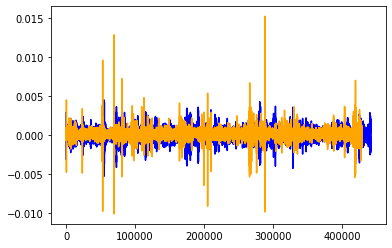

In [126]:
#%matplotlib notebook
import matplotlib.pyplot as plt 
#conv = 2/(2**15) 
plt.figure()
plt.plot(df_berk.y.values, color = 'blue')
plt.plot(df_piezo.CH0, color = 'orange')
plt.show()

In [127]:
 
fft_berk = processing.fft_(df_berk.x.values , 104)  
fft_piezo = processing.fft_(df_piezo.CH1.values, 100)

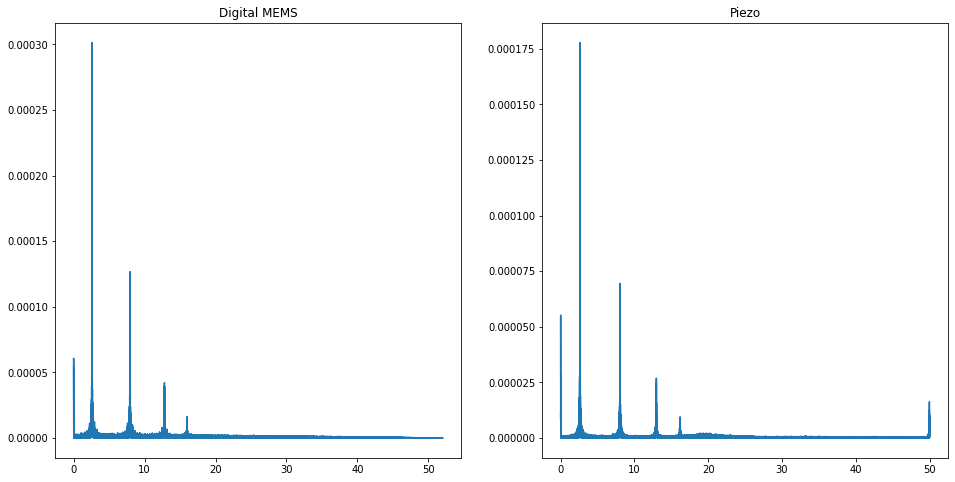

In [128]:
import matplotlib.pyplot as plt 
f = plt.figure(figsize=(16,8))

plt.subplot2grid( (1,2) , (0,0), fig = f)

plt.plot(fft_berk['frequency'], fft_berk['fft_'])
plt.title("Digital MEMS")


plt.subplot2grid( (1,2) , (0,1) , fig = f)
plt.plot(fft_piezo['frequency'], fft_piezo['fft_'])
plt.title("Piezo")
plt.show()